In [ ]:
import cv2 as cv
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
Covid=os.listdir("/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Covid")
Normal=os.listdir("/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Normal")
Pneumonia=os.listdir("/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Viral Pneumonia")

In [ ]:
x_1=[]
y_1=[]

for i in  Covid:
    #load the image
    image = cv.imread("/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Covid/"+i)
    #resize the image
    image = cv.resize(image, (224, 224))
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    x_1.append(image)
    y_1.append(1)

for i in Pneumonia:
    #load the image
    image = cv.imread("/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Viral Pneumonia/"+i)
    #resize the image
    image = cv.resize(image, (224, 224))
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    x_1.append(image)
    y_1.append(1)

for i in Normal:
    #load the image
    image = cv.imread("/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Normal/"+i)
    #resize the image
    image = cv.resize(image, (224, 224))
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    x_1.append(image)
    y_1.append(0)

x_1 = np.array(x_1)
y_1 = np.array(y_1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_1,y_1,stratify=y_1,random_state=5,test_size=0.2)
y_train1 = tf.keras.utils.to_categorical(y_train1)
y_test1 =tf.keras.utils.to_categorical(y_test1)

In [ ]:
from tensorflow.keras import backend as K

def auroc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auroc

In [ ]:
# Create a CNN model
model1 = keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224,1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu',),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu',),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='leaky_relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(2, activation='softmax')
])

In [ ]:
# # Define the desired learning rate
learning_rate = 0.01

from keras.optimizers import SGD
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model1.compile(loss = "categorical_crossentropy", optimizer = optimizer,metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model1.fit(x_train1, y_train1, epochs=20, validation_data=(x_test1, y_test1), callbacks=[early_stop],shuffle=True)

Epoch 1/20
7/7 [==============================] - 7s 830ms/step - loss: 0.5735 - accuracy: 0.8450 - precision_1: 0.8450 - recall_1: 0.8450 - auc: 0.8971 - val_loss: 4.0723 - val_accuracy: 0.8039 - val_precision_1: 0.8039 - val_recall_1: 0.8039 - val_auc: 0.8708
Epoch 2/20
7/7 [==============================] - 6s 793ms/step - loss: 0.6555 - accuracy: 0.8600 - precision_1: 0.8600 - recall_1: 0.8600 - auc: 0.8983 - val_loss: 1.5817 - val_accuracy: 0.7647 - val_precision_1: 0.7647 - val_recall_1: 0.7647 - val_auc: 0.8420
Epoch 3/20
7/7 [==============================] - 6s 880ms/step - loss: 0.4687 - accuracy: 0.8400 - precision_1: 0.8400 - recall_1: 0.8400 - auc: 0.9033 - val_loss: 0.7035 - val_accuracy: 0.7843 - val_precision_1: 0.7843 - val_recall_1: 0.7843 - val_auc: 0.8504
Epoch 4/20
7/7 [==============================] - 6s 835ms/step - loss: 0.4080 - accuracy: 0.8350 - precision_1: 0.8350 - recall_1: 0.8350 - auc: 0.9116 - val_loss: 14.5000 - val_accuracy: 0.7059 - val_precision_1:

2/2 [==============================] - 0s 136ms/step


<Axes: >

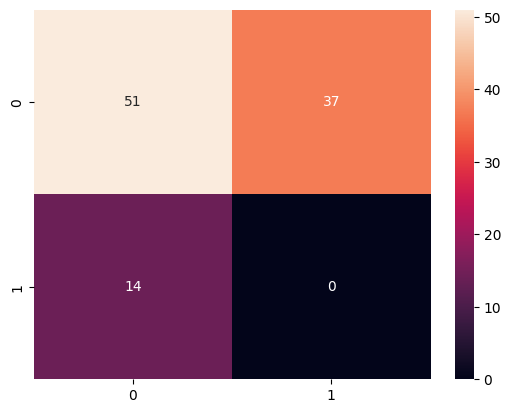

In [ ]:
y_predict=model1.predict(x_test1)
y_true=y_test1
res = tf.math.confusion_matrix(y_true,y_predict)
sns.heatmap(res,annot=True)

In [ ]:
x_2=[]
y_2=[]

for i in  Covid:
    #load the image
    image = cv.imread("/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Covid/"+i)
    #resize the image
    image = cv.resize(image, (224, 224))
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    x_2.append(image)
    y_2.append(1)

for i in Pneumonia:
    #load the image
    image = cv.imread("/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Viral Pneumonia/"+i)
    #resize the image
    image = cv.resize(image, (224, 224))
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    x_2.append(image)
    y_2.append(0)

x_2 = np.array(x_2)
y_2 = np.array(y_2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_2,y_2,stratify=y_2,random_state=5,test_size=0.2)
y_train = tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [ ]:
# Create a CNN model
model2 = keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='leaky_relu', input_shape=(224, 224,1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='leaky_relu',),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='leaky_relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='leaky_relu'),
    layers.Dropout(0.5),

    layers.Dense(2, activation='softmax')
])

In [ ]:
# # Define the desired learning rate
learning_rate = 0.01

# # Create an optimizer with the desired learning rate
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
model2.compile(optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
model2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stop],shuffle=True)

Epoch 1/10
5/5 [==============================] - 6s 882ms/step - loss: 5743.7378 - accuracy: 0.5972 - precision_2: 0.5972 - recall_2: 0.5972 - auc_1: 0.5972 - val_loss: 8962.0342 - val_accuracy: 0.3784 - val_precision_2: 0.3784 - val_recall_2: 0.3784 - val_auc_1: 0.3784
Epoch 2/10
5/5 [==============================] - 4s 794ms/step - loss: 2667.0637 - accuracy: 0.6667 - precision_2: 0.6667 - recall_2: 0.6667 - auc_1: 0.6667 - val_loss: 71.4543 - val_accuracy: 0.9730 - val_precision_2: 0.9730 - val_recall_2: 0.9730 - val_auc_1: 0.9730
Epoch 3/10
5/5 [==============================] - 4s 784ms/step - loss: 388.2737 - accuracy: 0.8542 - precision_2: 0.8542 - recall_2: 0.8542 - auc_1: 0.8542 - val_loss: 4853.8989 - val_accuracy: 0.6757 - val_precision_2: 0.6757 - val_recall_2: 0.6757 - val_auc_1: 0.6757
Epoch 4/10
5/5 [==============================] - 4s 779ms/step - loss: 921.4053 - accuracy: 0.8611 - precision_2: 0.8611 - recall_2: 0.8611 - auc_1: 0.8611 - val_loss: 325.4505 - val_acc

2/2 [==============================] - 0s 38ms/step


<Axes: >

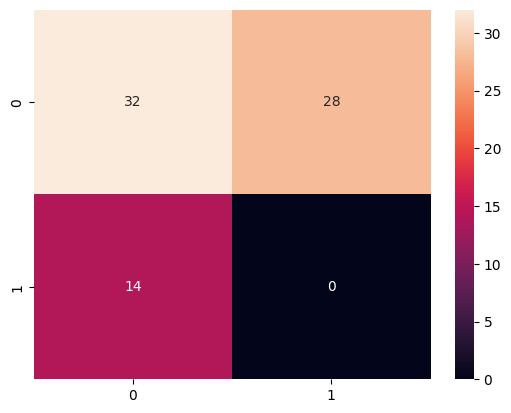

In [ ]:
y_predict=model2.predict(x_test)
y_true=y_test
res = tf.math.confusion_matrix(y_true,y_predict)
sns.heatmap(res,annot=True)